   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

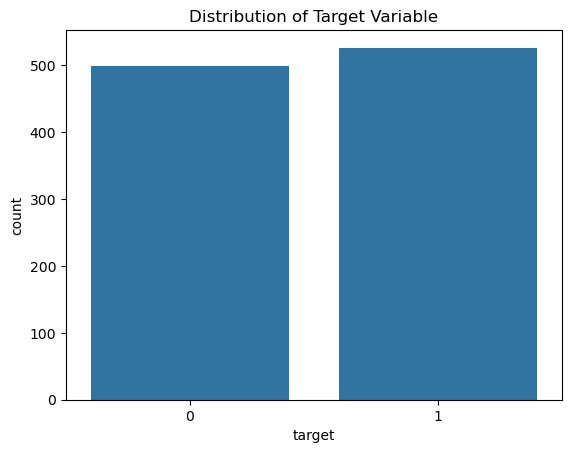

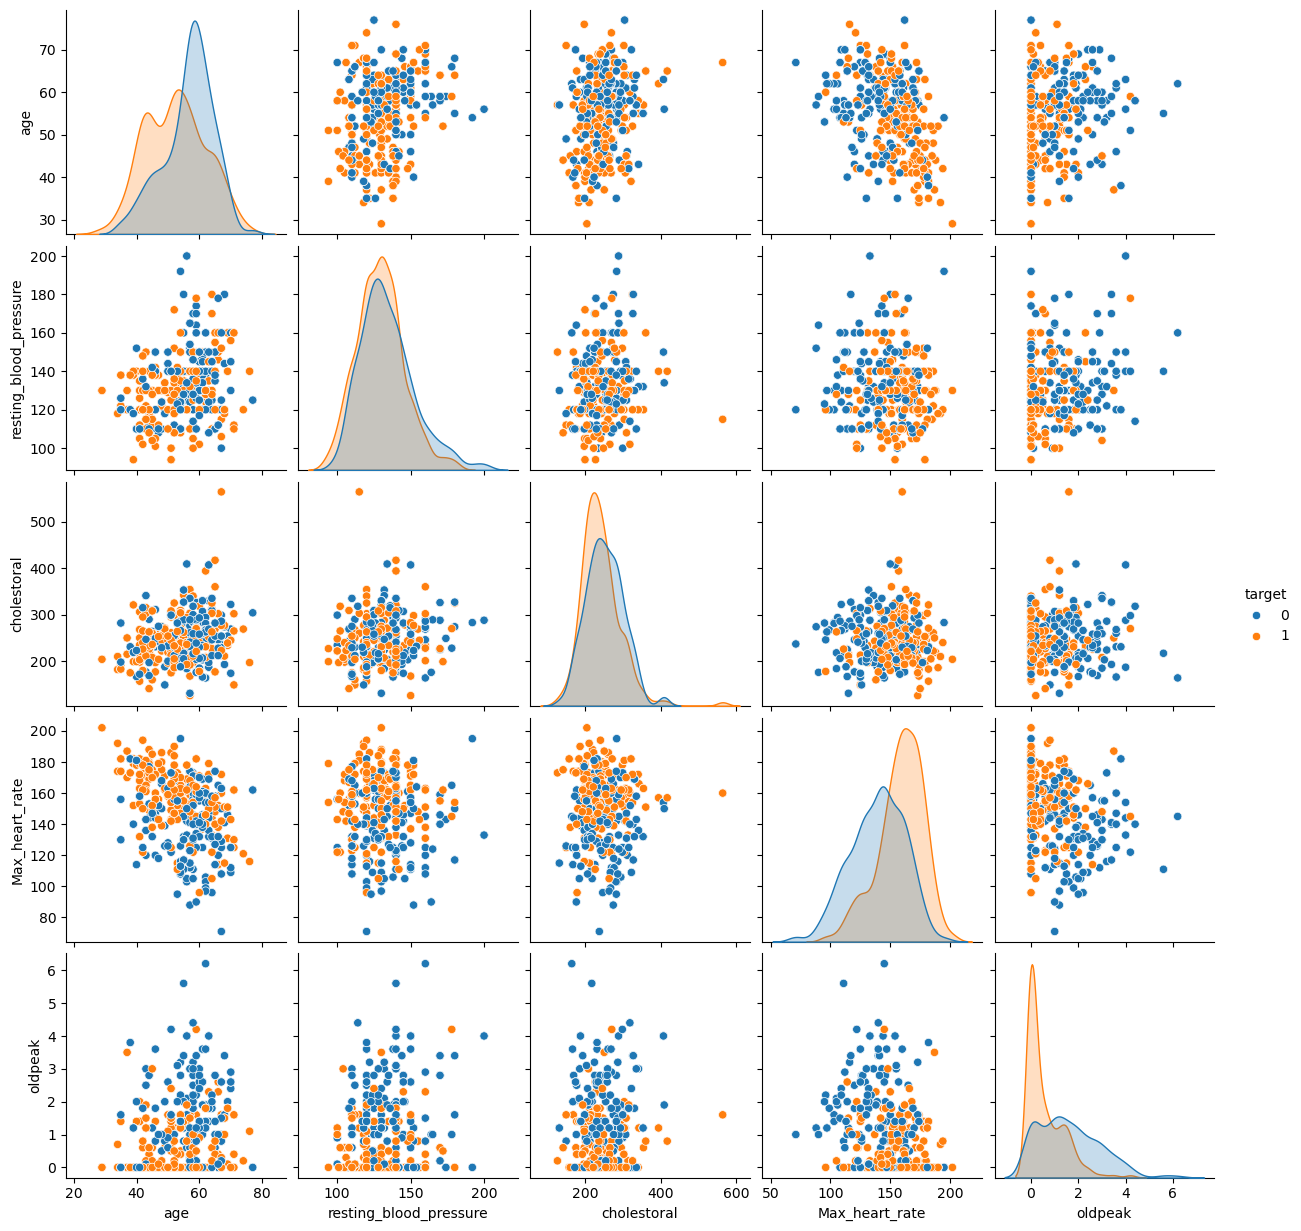

Training set shape: (820, 22)
Test set shape: (205, 22)
Class distribution in training set:
 target
1    423
0    397
Name: count, dtype: int64
Class distribution in test set:
 target
1    103
0    102
Name: count, dtype: int64

Model: Logistic Regression
  Accuracy:  0.80
  Precision: 0.77
  Recall:    0.84
  F1-Score:  0.81


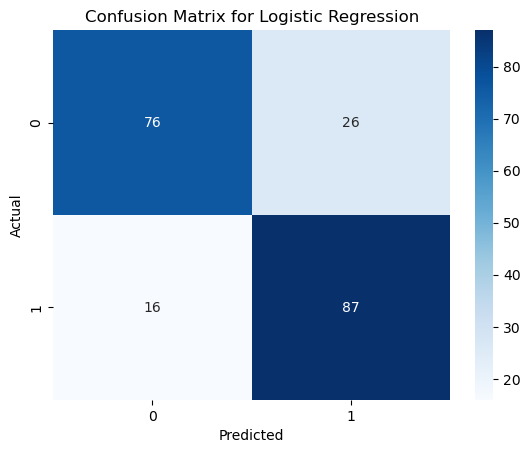

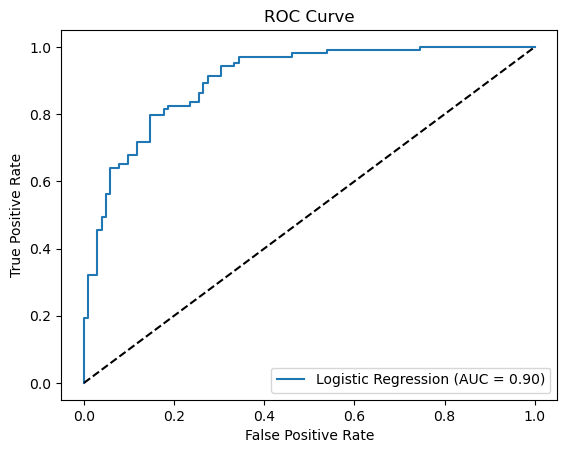


Model: Decision Tree
  Accuracy:  0.99
  Precision: 1.00
  Recall:    0.97
  F1-Score:  0.99


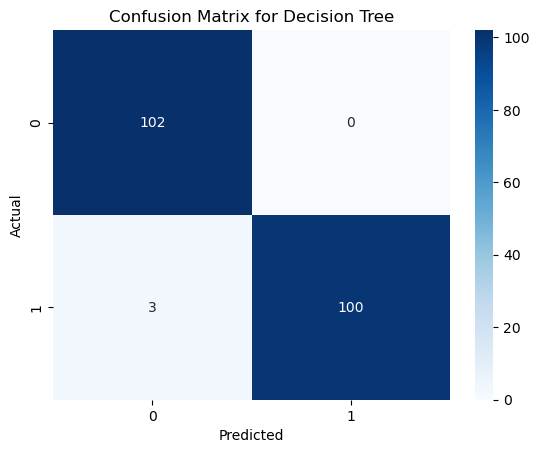

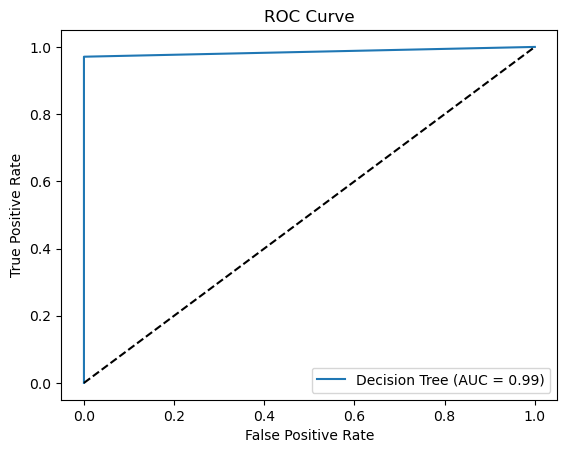


Model: Random Forest
  Accuracy:  0.99
  Precision: 1.00
  Recall:    0.97
  F1-Score:  0.99


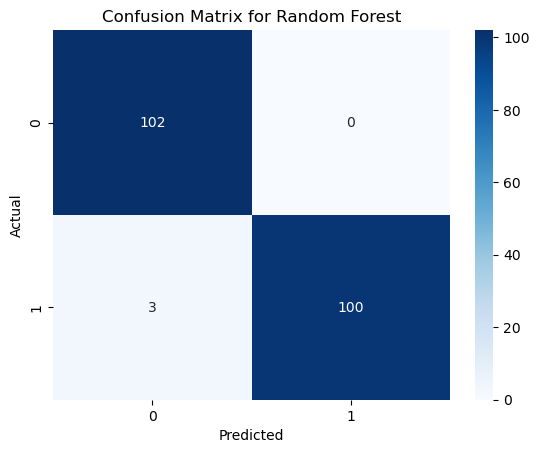

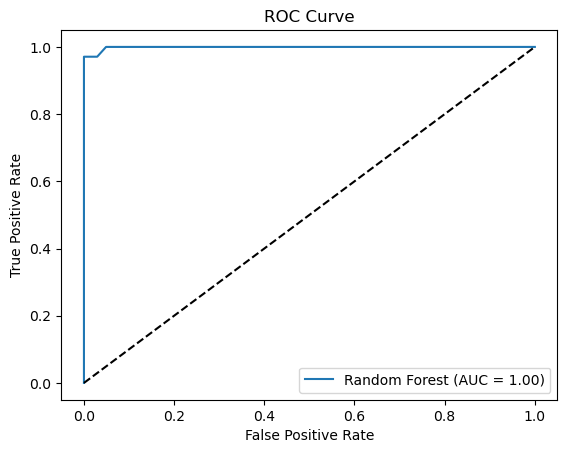


Model: Gradient Boosting
  Accuracy:  0.92
  Precision: 0.90
  Recall:    0.94
  F1-Score:  0.92


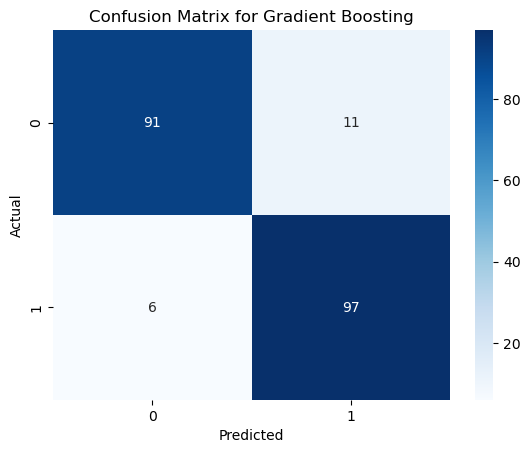

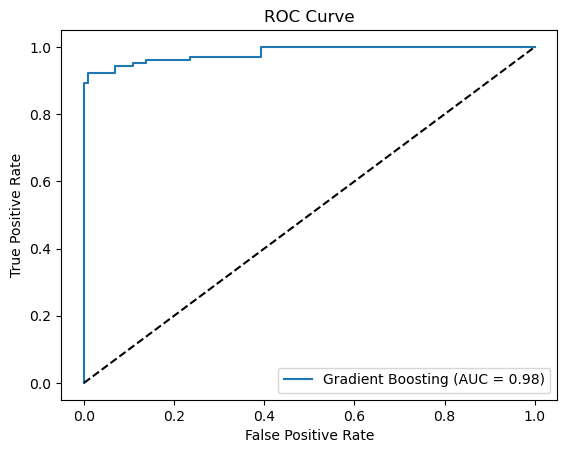


Model: K-Nearest Neighbors
  Accuracy:  0.86
  Precision: 0.86
  Recall:    0.87
  F1-Score:  0.87


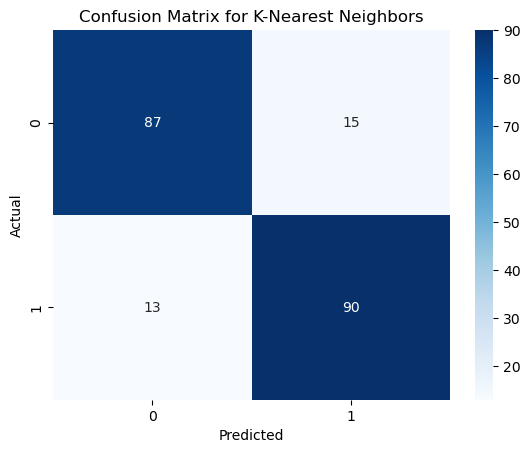

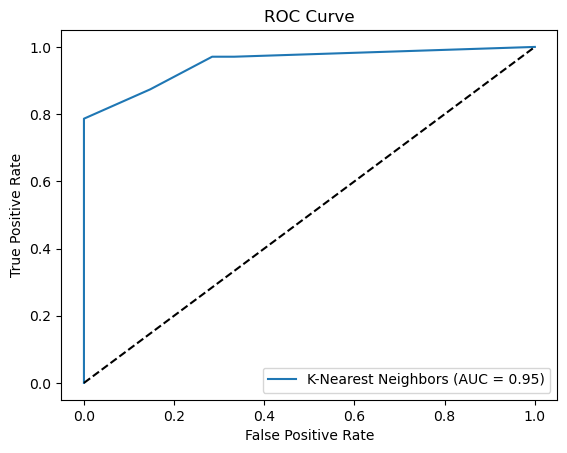

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Optimized Random Forest Performance:
  Accuracy:  0.99
  Precision: 1.00
  Recall:    0.97
  F1-Score:  0.99
Confusion Matrix for Best Model:
 [[102   0]
 [  3 100]]


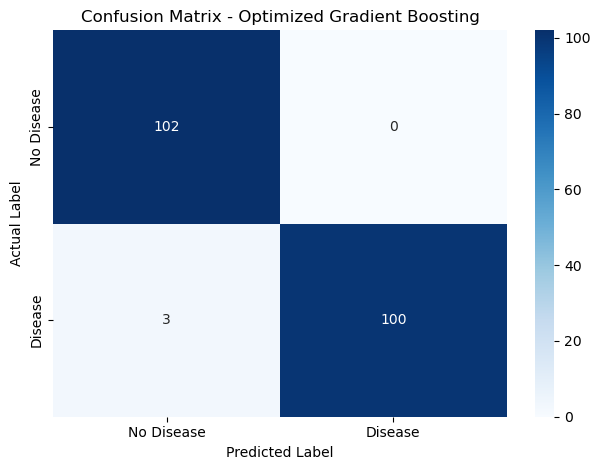

ROC AUC for Optimized Gradient Boosting: 0.99
Best model saved as 'best_heart_disease_model.pkl'


In [ ]:
# Heart Disease Prediction Project
# This script performs data loading, preprocessing, exploratory data analysis (EDA), model training, evaluation,
# and hyperparameter tuning for predicting heart disease using various machine learning algorithms.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)

# Load dataset
data = pd.read_csv('HeartDiseaseTrain-Test.csv')
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

# Exploratory Data Analysis
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()
sns.pairplot(data, hue='target')
plt.show()


# Feature Engineering
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale only the numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in training set:\n", pd.Series(y_train).value_counts())
print("Class distribution in test set:\n", pd.Series(y_test).value_counts())

# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"\nModel: {model_name}")
    print(f"  Accuracy:  {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall:    {recall:.2f}")
    print(f"  F1-Score:  {f1:.2f}")
    #print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

# Hyperparameter Tuning for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]

}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
#print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))
print(f"\nOptimized Random Forest Performance:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_best):.2f}")
print(f"  Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"  Recall:    {recall_score(y_test, y_pred_best):.2f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_best):.2f}")

print("Confusion Matrix for Best Model:\n", confusion_matrix(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Optimized Gradient Boosting')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_best)
print(f'ROC AUC for Optimized Gradient Boosting: {roc_auc:.2f}')

# Save the best model
import joblib
joblib.dump(best_model, 'best_heart_disease_model.pkl')
print("Best model saved as 'best_heart_disease_model.pkl'")






    
    

